# **Mission #1**

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2
import seaborn as sns

### 1. EDA수행 (10)

In [3]:
img_dir = '/Users/User/303/creator_camp/'
categoris = os.listdir(img_dir)
nb_categoris = len(categoris)
print(nb_categoris)

20


In [4]:
import os
#img_dir = './drive/MyDrive/data/'
categoris = os.listdir(img_dir)
image_total=0
count_list=[]

def folder_image_count(path):
    image_count = os.listdir(path)
    return len(image_count)

for i in range(nb_categoris):
    count=folder_image_count(img_dir+categoris[i])
    print("{0} : {1}개".format(categoris[i],count))
    image_total+=count
    count_list.append(count)
print("클래스의 개수는 {0}개 입니다".format(nb_categoris))
print("전체 데이터 개수는 {0}개 입니다.".format(image_total))

L2_10 : 1893개
L2_12 : 518개
L2_15 : 1509개
L2_20 : 410개
L2_21 : 410개
L2_24 : 782개
L2_25 : 6189개
L2_27 : 426개
L2_3 : 595개
L2_30 : 364개
L2_33 : 6206개
L2_34 : 419개
L2_39 : 454개
L2_40 : 180개
L2_41 : 593개
L2_44 : 547개
L2_45 : 631개
L2_46 : 2214개
L2_50 : 781개
L2_52 : 382개
클래스의 개수는 20개 입니다
전체 데이터 개수는 25503개 입니다.


In [5]:
import math
percent_list=[]
for i in range(nb_categoris):
  percent=count_list[i] / image_total * 100
  percent=round(percent,3)
  percent_list.append(percent)

In [6]:
print(count_list)

[1893, 518, 1509, 410, 410, 782, 6189, 426, 595, 364, 6206, 419, 454, 180, 593, 547, 631, 2214, 781, 382]


In [7]:
print(categoris)

['L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_3', 'L2_30', 'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52']


In [8]:
dataframe=pd.DataFrame({"Category":categoris,
                      "Count": count_list,
                      "Percent": percent_list} )
dataframe.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Category,L2_10,L2_12,L2_15,L2_20,L2_21,L2_24,L2_25,L2_27,L2_3,L2_30,L2_33,L2_34,L2_39,L2_40,L2_41,L2_44,L2_45,L2_46,L2_50,L2_52
Count,1893,518,1509,410,410,782,6189,426,595,364,6206,419,454,180,593,547,631,2214,781,382
Percent,7.423,2.031,5.917,1.608,1.608,3.066,24.268,1.67,2.333,1.427,24.334,1.643,1.78,0.706,2.325,2.145,2.474,8.681,3.062,1.498


In [9]:
dataframe.describe()

,Count,Percent
count,20.000000,20.00000
mean,1275.150000,4.99995
std,1764.613549,6.91923
min,180.000000,0.70600
25%,416.750000,1.63425
50%,570.000000,2.23500
75%,963.750000,3.77875
max,6206.000000,24.33400


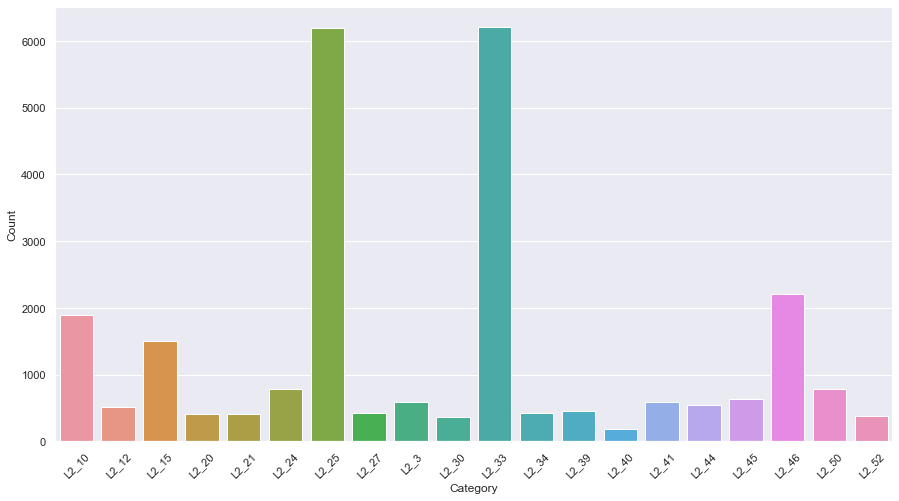

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
fig = sns.barplot(x='Category',y='Count',data=dataframe)
plt.xticks(rotation=45)
plt.show()

In [14]:
# import glob
# #print(nb_categoris)
# img_name_list=[] # 파일명 리스트
# channel_list=[]  # 영상 채널 리스트
# ext_list=[] # 확장자 리스트
# width_list=[] # 영상 데이터 가로 길이
# height_list=[] # 영상 데이터 세로 길이
# cat_list=[] # 클래스
# path_list=[] # 이미지 경로
# for i in range(nb_categoris):
#   a=glob.glob(img_dir+categoris[i]+'/*')
#   for j in range(len(a)):
#     cat_img_name= a[j].split('/')[-1:]
#     temp=cat_img_name[0].split('\\')
#     #print(temp)
#     #print(cat_img_name)
#     img_name=temp[-1]
#     #print(img_name)
#     cat=temp[0]
#     #print(cat)
#     ext=img_name.split('.')[-1]
#     #print(cat)
#     #print(img_name)
#     #print(ext)
#     img = cv2.imread(a[j], cv2.IMREAD_UNCHANGED) #cv2.IMREAD_UNCHANGED 해당 옵션이 있어야 채널값이 4인 데이터 분별 가능 
#     if img.ndim ==2: # 흑백 이미지의 경우 채널값이 없는 2차원 배열이므로 조건문처리
#       w, h = img.shape
#       c=1
#     else:
#       w, h, c = img.shape
#     cat_list.append(cat)
#     img_name_list.append(img_name)
#     ext_list.append(ext)
#     width_list.append(w)
#     height_list.append(h)
#     channel_list.append(c)
#     path_list.append(a[j])

In [15]:
# img_info=pd.DataFrame({"IMG_ID":img_name_list,
#                        "Category": cat_list,
#                       "Extension": ext_list,
#                       "Width": width_list,
#                       "Height": height_list,
#                       "Channel": channel_list,
#                        "Path": path_list} )
# img_info

In [16]:
#img_info.to_csv('./img_info.csv',index=False)

In [17]:
img_info=pd.read_csv("./img_info.csv")

In [18]:
img_info

,IMG_ID,Category,Extension,Width,Height,Channel,Path
0,aamhfbsxjoqkqsxnnpoy.jpg,L2_10,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_10\aamhfbsxjoq...
1,aatdcomdixgejmiibsft.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatdcomdixg...
2,aatmmprdzkzdkbfcslkx.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatmmprdzkz...
3,abaoovbyxzqodvhoasko.jpg,L2_10,jpg,2480,3508,3,/Users/User/303/creator_camp/L2_10\abaoovbyxzq...
4,abymagsohyagiheolkhk.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\abymagsohya...
...,...,...,...,...,...,...,...
25498,zslxpqgjoxxxnfcgaqbc.jpg,L2_52,jpg,700,700,3,/Users/User/303/creator_camp/L2_52\zslxpqgjoxx...
25499,ztedlwqpolocumvrpkdt.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\ztedlwqpolo...
25500,zukfkicrimhykqtrxkbe.png,L2_52,png,700,700,3,/Users/User/303/creator_camp/L2_52\zukfkicrimh...
25501,zvpheaqohuqevixkjspd.jpg,L2_52,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_52\zvpheaqohuq...


In [19]:
img_info2=img_info

img_info2['img']=img_info2.IMG_ID.str.split('.').str[0]
img_info2.head()

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
0,aamhfbsxjoqkqsxnnpoy.jpg,L2_10,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_10\aamhfbsxjoq...,aamhfbsxjoqkqsxnnpoy
1,aatdcomdixgejmiibsft.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatdcomdixg...,aatdcomdixgejmiibsft
2,aatmmprdzkzdkbfcslkx.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatmmprdzkz...,aatmmprdzkzdkbfcslkx
3,abaoovbyxzqodvhoasko.jpg,L2_10,jpg,2480,3508,3,/Users/User/303/creator_camp/L2_10\abaoovbyxzq...,abaoovbyxzqodvhoasko
4,abymagsohyagiheolkhk.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\abymagsohya...,abymagsohyagiheolkhk


In [21]:
img_info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25503 entries, 0 to 25502
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMG_ID     25503 non-null  object
 1   Category   25503 non-null  object
 2   Extension  25503 non-null  object
 3   Width      25503 non-null  int64 
 4   Height     25503 non-null  int64 
 5   Channel    25503 non-null  int64 
 6   Path       25503 non-null  object
 7   img        25503 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.6+ MB


In [22]:
#중복이미지 확인
img_info2.drop_duplicates(['img'],inplace=True)
img_info2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 0 to 25502
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMG_ID     25503 non-null  object
 1   Category   25503 non-null  object
 2   Extension  25503 non-null  object
 3   Width      25503 non-null  int64 
 4   Height     25503 non-null  int64 
 5   Channel    25503 non-null  int64 
 6   Path       25503 non-null  object
 7   img        25503 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.8+ MB


In [24]:
img_info.Channel.unique()

array([3, 4, 1], dtype=int64)

In [25]:
#결측값
img_info.isnull().sum()

IMG_ID       0
Category     0
Extension    0
Width        0
Height       0
Channel      0
Path         0
img          0
dtype: int64

In [26]:
# 클래스 별 데이터 개수 및 평균
print(img_info.groupby("Category")["IMG_ID"].count())
print('\n')
print(img_info.groupby("Category")["IMG_ID"].count().mean())

Category
L2_10    1893
L2_12     518
L2_15    1509
L2_20     410
L2_21     410
L2_24     782
L2_25    6189
L2_27     426
L2_3      595
L2_30     364
L2_33    6206
L2_34     419
L2_39     454
L2_40     180
L2_41     593
L2_44     547
L2_45     631
L2_46    2214
L2_50     781
L2_52     382
Name: IMG_ID, dtype: int64


1275.15


In [27]:
img_info[img_info.Channel==1]

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
5355,tymqqdoygnolomnkjkph.jpg,L2_24,jpg,3508,2480,1,/Users/User/303/creator_camp/L2_24\tymqqdoygno...,tymqqdoygnolomnkjkph
12971,sejkpoipoqtssdispyqq.jpg,L2_30,jpg,3508,2480,1,/Users/User/303/creator_camp/L2_30\sejkpoipoqt...,sejkpoipoqtssdispyqq
13093,ztkcyprbncgkluufgxxh.jpg,L2_30,jpg,3508,2480,1,/Users/User/303/creator_camp/L2_30\ztkcyprbncg...,ztkcyprbncgkluufgxxh
21836,oitkkvuasrrheybiwgfw.jpg,L2_45,jpg,2480,3508,1,/Users/User/303/creator_camp/L2_45\oitkkvuasrr...,oitkkvuasrrheybiwgfw
21896,qowbaduogreoqlqgkzsc.jpg,L2_45,jpg,3508,2480,1,/Users/User/303/creator_camp/L2_45\qowbaduogre...,qowbaduogreoqlqgkzsc
22096,yudjtlslwipvblwncold.jpg,L2_45,jpg,3508,2480,1,/Users/User/303/creator_camp/L2_45\yudjtlslwip...,yudjtlslwipvblwncold


In [28]:
img_info[img_info.Channel==4]

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
57,asjxvuunbzusockndamb.png,L2_10,png,700,700,4,/Users/User/303/creator_camp/L2_10\asjxvuunbzu...,asjxvuunbzusockndamb
83,azezmjbkdruxaetggemw.png,L2_10,png,700,700,4,/Users/User/303/creator_camp/L2_10\azezmjbkdru...,azezmjbkdruxaetggemw
187,ckiazuwmswqtllwzjcjk.png,L2_10,png,700,700,4,/Users/User/303/creator_camp/L2_10\ckiazuwmswq...,ckiazuwmswqtllwzjcjk
189,cledyjrwyrocleoqxcxj.png,L2_10,png,700,700,4,/Users/User/303/creator_camp/L2_10\cledyjrwyro...,cledyjrwyrocleoqxcxj
192,clvmiwqtqeurdtbczkxv.png,L2_10,png,700,700,4,/Users/User/303/creator_camp/L2_10\clvmiwqtqeu...,clvmiwqtqeurdtbczkxv
...,...,...,...,...,...,...,...,...
25463,xcpjiailwgyywdftikya.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\xcpjiailwgy...,xcpjiailwgyywdftikya
25467,xirgpzcmwthrwkshaoor.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\xirgpzcmwth...,xirgpzcmwthrwkshaoor
25472,xwwrotbclxxzvqlkmejn.png,L2_52,png,1200,1200,4,/Users/User/303/creator_camp/L2_52\xwwrotbclxx...,xwwrotbclxxzvqlkmejn
25488,yyexhfajytbxwflbvlxd.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\yyexhfajytb...,yyexhfajytbxwflbvlxd


In [30]:
# 클래스 수
#print(img_info.Category.unique())
print("클래스 => {0}개".format(len(img_info.Category.unique())))
print("*"*30)
# 채널 개수
print("1 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==1].count()))
print("3 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==3].count()))
print("4 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==4].count()))
print("*"*30)
# 확장자
print("파일 확장자 => {0}".format(img_info.Extension.unique()))
print("JPG FIle : {0} 개".format(img_info.IMG_ID[img_info.Extension=='jpg'].count()))
print("PNG FIle : {0} 개".format(img_info.IMG_ID[img_info.Extension=='png'].count()))
print("*"*30)
# 영상데이터 크기
print("이미지 크기 Min,Max")
print("Max Width : {0}".format(img_info.Width.max()))
print("Min Width : {0}".format(img_info.Width.min()))
print("Max Height : {0}".format(img_info.Height.max()))
print("Min Height : {0}".format(img_info.Height.min()))

클래스 => 20개
******************************
1 Channel : 6 개
3 Channel : 24360 개
4 Channel : 1137 개
******************************
파일 확장자 => ['jpg' 'png']
JPG FIle : 23992 개
PNG FIle : 1511 개
******************************
이미지 크기 Min,Max
Max Width : 5000
Min Width : 97
Max Height : 5001
Min Height : 162


## 2. 문제점 도출 (10)

1. 데이터 불균형 -> 오버샘플링 , 언더샘플링 필요
>  -> L2_25 , L2_33 클래스가 절반 차지

2. 영상 데이터 차원 1, 3, 4 차원으로 다양함
> 4차원-> RGBA


3. 확장자 png , jpg 두 종류
4. 너비, 높이 Resize 필요

5. 특정 클래스에 불필요한 인물, 풍경사진 포함 -> 일러스트와 사진 이진분류로 사진 삭제-> 2번문제

 영상 색상 경고??
> 해결방안
https://jh-bk.tistory.com/41




image.png

## 데이터 분포 문제 해결(10)

1. 데이터 불균형 -> 오버샘플링 , 언더샘플링 필요
>  -> L2_25 , L2_33 클래스가 절반 차지

  > 일정 수치를 기준으로 데이터 작은 클래스는 augmentation 하고 많은 클래스는 랜덤 추출  


2. 영상 데이터 차원 1, 3, 4 차원으로 다양함
> 4차원-> RGBA
 
 **해결방안**
 1차원의 이미지 -> 6개이므로 삭제 /
 4차원의 이미지 -> cv2.COLOR_BGRA2BGR을 통해 3차원으로 변경, cv2.IMREAD_UNCHANGED 옵션 안넣으면 자동으로 3채널로 인식

3. 확장자 png , jpg 두 종류

4. 너비, 높이 Resize 필요 (ex) 32px 64px ~~

In [33]:
# 흑백 이미지 삭제
ch1_index=img_info[img_info.Channel==1].index
img_info= img_info.drop(ch1_index)
img_info.Channel.unique()

array([3, 4], dtype=int64)

In [34]:
# 재확인
img_info[img_info.Channel==1]

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img


In [35]:
img_info.reset_index(drop=True)

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
0,aamhfbsxjoqkqsxnnpoy.jpg,L2_10,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_10\aamhfbsxjoq...,aamhfbsxjoqkqsxnnpoy
1,aatdcomdixgejmiibsft.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatdcomdixg...,aatdcomdixgejmiibsft
2,aatmmprdzkzdkbfcslkx.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatmmprdzkz...,aatmmprdzkzdkbfcslkx
3,abaoovbyxzqodvhoasko.jpg,L2_10,jpg,2480,3508,3,/Users/User/303/creator_camp/L2_10\abaoovbyxzq...,abaoovbyxzqodvhoasko
4,abymagsohyagiheolkhk.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\abymagsohya...,abymagsohyagiheolkhk
...,...,...,...,...,...,...,...,...
25492,zslxpqgjoxxxnfcgaqbc.jpg,L2_52,jpg,700,700,3,/Users/User/303/creator_camp/L2_52\zslxpqgjoxx...,zslxpqgjoxxxnfcgaqbc
25493,ztedlwqpolocumvrpkdt.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\ztedlwqpolo...,ztedlwqpolocumvrpkdt
25494,zukfkicrimhykqtrxkbe.png,L2_52,png,700,700,3,/Users/User/303/creator_camp/L2_52\zukfkicrimh...,zukfkicrimhykqtrxkbe
25495,zvpheaqohuqevixkjspd.jpg,L2_52,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_52\zvpheaqohuq...,zvpheaqohuqevixkjspd


In [36]:
img_info.groupby("Category")["IMG_ID"].count()

Category
L2_10    1893
L2_12     518
L2_15    1509
L2_20     410
L2_21     410
L2_24     781
L2_25    6189
L2_27     426
L2_3      595
L2_30     362
L2_33    6206
L2_34     419
L2_39     454
L2_40     180
L2_41     593
L2_44     547
L2_45     628
L2_46    2214
L2_50     781
L2_52     382
Name: IMG_ID, dtype: int64